In [1]:
import pandas as pd
from sklearn.svm import LinearSVR  
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("data.csv")

In [3]:
data.head()

,Unnamed: 0,小区名字,总价,户型,建筑面积,单价,朝向,楼层,装修,区域
0,0,中天北湾新城,89万,2室2厅1卫,89平米,10000元/平米,南北,低层,毛坯,高新
1,1,桦林苑,99.8万,3室2厅1卫,143平米,6979元/平米,南北,中层,毛坯,净月
2,2,嘉柏湾,32万,1室1厅1卫,43.3平米,7390元/平米,南,高层,精装修,经开
3,3,中环12区,51.5万,2室1厅1卫,57平米,9035元/平米,南北,高层,精装修,南关
4,4,昊源高格蓝湾,210万,3室2厅2卫,160.8平米,13060元/平米,南北,高层,精装修,二道


In [4]:
del data["Unnamed: 0"]

In [5]:
data.head()

,小区名字,总价,户型,建筑面积,单价,朝向,楼层,装修,区域
0,中天北湾新城,89万,2室2厅1卫,89平米,10000元/平米,南北,低层,毛坯,高新
1,桦林苑,99.8万,3室2厅1卫,143平米,6979元/平米,南北,中层,毛坯,净月
2,嘉柏湾,32万,1室1厅1卫,43.3平米,7390元/平米,南,高层,精装修,经开
3,中环12区,51.5万,2室1厅1卫,57平米,9035元/平米,南北,高层,精装修,南关
4,昊源高格蓝湾,210万,3室2厅2卫,160.8平米,13060元/平米,南北,高层,精装修,二道


In [6]:
data.shape

(2583, 9)

In [7]:
data.isnull().any() #C存在缺失值返回True

小区名字    True
总价      True
户型      True
建筑面积    True
单价      True
朝向      True
楼层      True
装修      True
区域      True
dtype: bool

In [8]:
data.dropna(inplace=True)

In [9]:
data.shape

(2551, 9)

In [10]:
data['单价'] = data['单价'].map(lambda d: d.replace('元/平米', '')).astype(float)
data['总价'] = data['总价'].map(lambda z: z.replace('万', '')).astype(float)
data['建筑面积'] = data['建筑面积'].map(lambda p: p.replace('平米', '')).astype(float)

In [11]:
data.head()

,小区名字,总价,户型,建筑面积,单价,朝向,楼层,装修,区域
0,中天北湾新城,89.0,2室2厅1卫,89.0,10000.0,南北,低层,毛坯,高新
1,桦林苑,99.8,3室2厅1卫,143.0,6979.0,南北,中层,毛坯,净月
2,嘉柏湾,32.0,1室1厅1卫,43.3,7390.0,南,高层,精装修,经开
3,中环12区,51.5,2室1厅1卫,57.0,9035.0,南北,高层,精装修,南关
4,昊源高格蓝湾,210.0,3室2厅2卫,160.8,13060.0,南北,高层,精装修,二道


## 获取各区二手房均价分析

In [12]:
group_average_price = data.groupby('区域').agg({"单价":'mean'})

In [13]:
group_average_price

,单价
区域,
二道,9642.367347
净月,12426.877133
南关,10602.396887
宽城,8062.537594
朝阳,14328.618834
汽开,9176.100000
经开,9369.863333
绿园,9654.157895
高新,11009.233161


In [14]:
x=list(group_average_price.index)

In [15]:
y=group_average_price['单价'].values.astype(int)

In [16]:
x,y

(['二道', '净月', '南关', '宽城', '朝阳', '汽开', '经开', '绿园', '高新'],
 array([ 9642, 12426, 10602,  8062, 14328,  9176,  9369,  9654, 11009]))

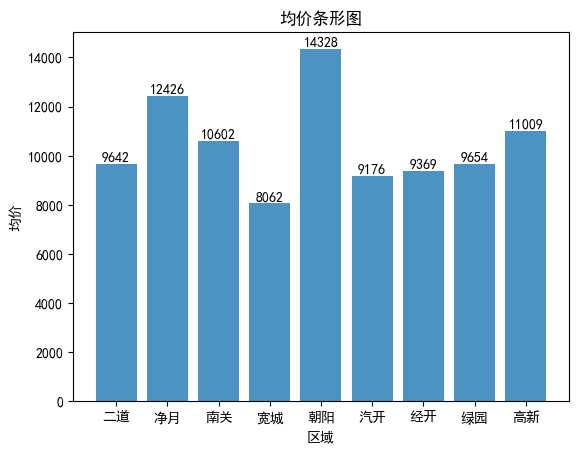

In [17]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.figure()                         
plt.bar(x,y, alpha=0.8)              
plt.xlabel("区域")                    
plt.ylabel("均价")                    
plt.title("均价条形图")                    
for a, b in zip(x,y):          
    plt.text(a, b + 100, b, ha='center')
plt.show()        

## 获取各区房子数量比例

In [18]:
group_number = data.groupby('区域').size()

In [19]:
group_number

区域
二道    490
净月    293
南关    257
宽城    266
朝阳    223
汽开     70
经开    300
绿园    266
高新    386
dtype: int64

In [20]:
percentage = group_number/group_number.values.sum() 

In [21]:
percentage

区域
二道    0.192082
净月    0.114857
南关    0.100745
宽城    0.104273
朝阳    0.087417
汽开    0.027440
经开    0.117601
绿园    0.104273
高新    0.151313
dtype: float64

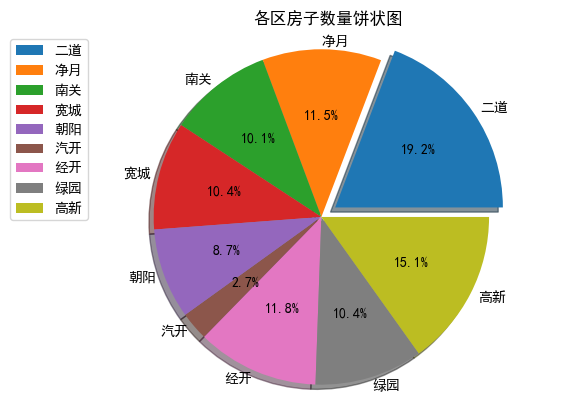

In [22]:
plt.figure()                         
plt.pie(percentage.values,labels=group_number.index,labeldistance=1.05,autopct="%1.1f%%",explode=[0.1,0,0,0,0,0,0,0,0],
        shadow=True, startangle=0, pctdistance=0.6)
plt.axis("equal")  
plt.title("各区房子数量饼状图", fontsize=12)
plt.legend(bbox_to_anchor=(0.03, 1)) 
plt.show()  

## 获取全市二手房装修程度对比

In [23]:
group_renovation = data.groupby('装修').size()

In [24]:
group_renovation

装修
中装修       82
暂无       124
毛坯       236
简装修      226
精装修     1602
豪华装修     281
dtype: int64

In [25]:
type_renovation = list(group_renovation.index)     
number = group_renovation.values  

In [26]:
type_renovation,number

(['中装修', '暂无', '毛坯', '简装修', '精装修', '豪华装修'],
 array([  82,  124,  236,  226, 1602,  281], dtype=int64))

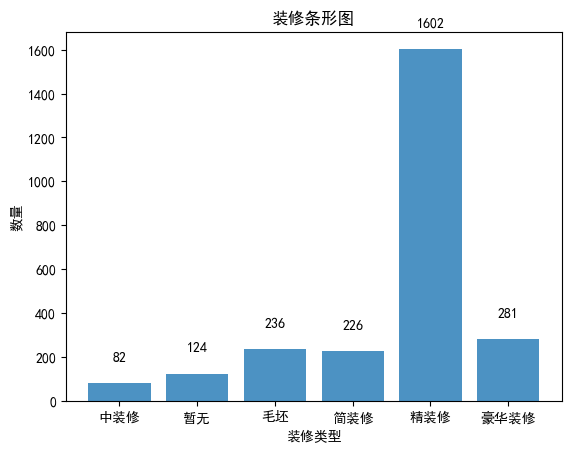

In [27]:
plt.figure()                         
plt.bar(type_renovation,number, alpha=0.8)              
plt.xlabel("装修类型")                    
plt.ylabel("数量")                 
plt.title("装修条形图")                    
for a, b in zip(type_renovation,number):   
    plt.text(a, b + 100, b, ha='center')
plt.show()   

## 获取二手房热门户型均价

In [28]:
house_type_number = data.groupby('户型').size().sort_values(ascending=False)

In [29]:
house_type_number.head()

户型
2室2厅1卫    953
2室1厅1卫    571
3室2厅2卫    360
3室2厅1卫    212
1室1厅1卫    164
dtype: int64

In [30]:
house_type_number.shape

(46,)

In [31]:
house_type_mean = data.groupby('户型').agg({"单价":'mean'})

In [32]:
type(house_type_mean)

pandas.core.frame.DataFrame

In [33]:
house_type_mean.head()

,单价
户型,
1室1厅1卫,9535.743902
1室2厅1卫,8285.500000
2室1厅1卫,10019.640981
2室1厅2卫,10510.000000
2室2厅1卫,9774.511018


In [34]:
top_five=house_type_number.head()

In [35]:
top_five

户型
2室2厅1卫    953
2室1厅1卫    571
3室2厅2卫    360
3室2厅1卫    212
1室1厅1卫    164
dtype: int64

In [36]:
house_type_price = house_type_mean.loc[top_five.index,'单价']

In [37]:
house_type_price

户型
2室2厅1卫     9774.511018
2室1厅1卫    10019.640981
3室2厅2卫    11257.191667
3室2厅1卫    10626.452830
1室1厅1卫     9535.743902
Name: 单价, dtype: float64

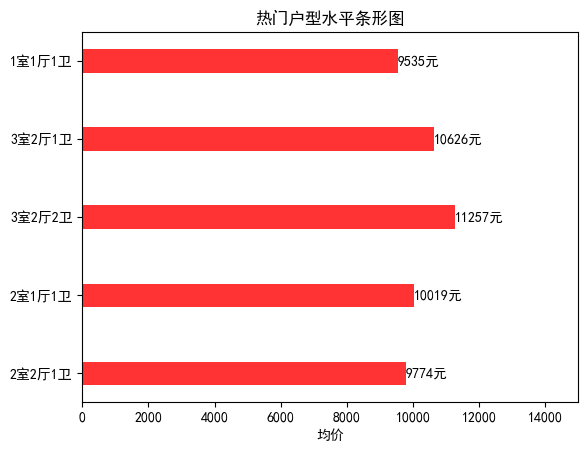

In [38]:
x=list(top_five.index)
plt.figure()                                            
plt.barh(x, house_type_price.values, height=0.3, color='r', alpha=0.8)  
plt.xlim(0, 15000)                   
plt.xlabel("均价")                   
plt.title("热门户型水平条形图")                     
for a, b in zip(x,house_type_price.values):  
    plt.text(b+10,a,str(int(b))+'元', va='center')   
plt.show()        

## 价格预测

In [39]:
data_copy = data.copy()  

In [40]:
data_copy.head()

,小区名字,总价,户型,建筑面积,单价,朝向,楼层,装修,区域
0,中天北湾新城,89.0,2室2厅1卫,89.0,10000.0,南北,低层,毛坯,高新
1,桦林苑,99.8,3室2厅1卫,143.0,6979.0,南北,中层,毛坯,净月
2,嘉柏湾,32.0,1室1厅1卫,43.3,7390.0,南,高层,精装修,经开
3,中环12区,51.5,2室1厅1卫,57.0,9035.0,南北,高层,精装修,南关
4,昊源高格蓝湾,210.0,3室2厅2卫,160.8,13060.0,南北,高层,精装修,二道


In [41]:
 data_copy[['室', '厅', '卫']] = data_copy['户型'].str.extract('(\d+)室(\d+)厅(\d+)卫') #括号里为需要的值

In [42]:
 data_copy[['室', '厅', '卫']]= data_copy[['室', '厅', '卫']].astype(float)

In [43]:
data_copy.head()

,小区名字,总价,户型,建筑面积,单价,朝向,楼层,装修,区域,室,厅,卫
0,中天北湾新城,89.0,2室2厅1卫,89.0,10000.0,南北,低层,毛坯,高新,2.0,2.0,1.0
1,桦林苑,99.8,3室2厅1卫,143.0,6979.0,南北,中层,毛坯,净月,3.0,2.0,1.0
2,嘉柏湾,32.0,1室1厅1卫,43.3,7390.0,南,高层,精装修,经开,1.0,1.0,1.0
3,中环12区,51.5,2室1厅1卫,57.0,9035.0,南北,高层,精装修,南关,2.0,1.0,1.0
4,昊源高格蓝湾,210.0,3室2厅2卫,160.8,13060.0,南北,高层,精装修,二道,3.0,2.0,2.0


In [44]:
del data_copy['小区名字']
del data_copy['户型']
del data_copy['朝向']
del data_copy['楼层']
del data_copy['装修']
del data_copy['区域']
del data_copy['单价']

In [45]:
data_copy.head()

,总价,建筑面积,室,厅,卫
0,89.0,89.0,2.0,2.0,1.0
1,99.8,143.0,3.0,2.0,1.0
2,32.0,43.3,1.0,1.0,1.0
3,51.5,57.0,2.0,1.0,1.0
4,210.0,160.8,3.0,2.0,2.0


In [46]:
data_copy.dropna(axis=0, how='any', inplace=True)

In [47]:
data_copy.shape

(2533, 5)

In [48]:
data1=data_copy[data_copy['建筑面积'] < 300].reset_index(drop=True)

In [49]:
data1.head()

,总价,建筑面积,室,厅,卫
0,89.0,89.0,2.0,2.0,1.0
1,99.8,143.0,3.0,2.0,1.0
2,32.0,43.3,1.0,1.0,1.0
3,51.5,57.0,2.0,1.0,1.0
4,210.0,160.8,3.0,2.0,2.0


In [50]:
data1.shape

(2505, 5)

In [51]:
data1.loc[2505] = [None, 88.0, 2.0, 1.0, 1.0]
data1.loc[2506] = [None, 136.0, 3.0, 2.0, 2.0]

In [52]:
data1.tail()

,总价,建筑面积,室,厅,卫
2502,75.0,110.00,2.0,2.0,1.0
2503,100.0,109.73,2.0,2.0,1.0
2504,48.8,61.00,2.0,2.0,1.0
2505,NaN,88.00,2.0,1.0,1.0
2506,NaN,136.00,3.0,2.0,2.0


In [53]:
data2 = data1.loc[0:2504]

In [54]:
data2.tail()

,总价,建筑面积,室,厅,卫
2500,115.0,153.95,3.0,2.0,2.0
2501,99.8,91.30,2.0,2.0,1.0
2502,75.0,110.00,2.0,2.0,1.0
2503,100.0,109.73,2.0,2.0,1.0
2504,48.8,61.00,2.0,2.0,1.0


In [55]:
mean=data2.mean()
std=data2.std()

In [56]:
mean,std

(总价      106.254351
 建筑面积     99.583541
 室         2.312575
 厅         1.715369
 卫         1.254291
 dtype: float64,
 总价      66.729280
 建筑面积    38.608237
 室        0.725575
 厅        0.512643
 卫        0.527599
 dtype: float64)

In [57]:
data2 = (data2-mean)/std

In [58]:
data2.head()

,总价,建筑面积,室,厅,卫
0,-0.258572,-0.274127,-0.430796,0.555222,-0.481978
1,-0.096724,1.124539,0.947421,0.555222,-0.481978
2,-1.112770,-1.457812,-1.809013,-1.395453,-0.481978
3,-0.820545,-1.102965,-0.430796,-1.395453,-0.481978
4,1.554725,1.585580,0.947421,0.555222,1.413399


In [59]:
train_data = data2.loc[0:2504,['建筑面积',  '室', '厅', '卫']]

In [60]:
train_data.head()

,建筑面积,室,厅,卫
0,-0.274127,-0.430796,0.555222,-0.481978
1,1.124539,0.947421,0.555222,-0.481978
2,-1.457812,-1.809013,-1.395453,-0.481978
3,-1.102965,-0.430796,-1.395453,-0.481978
4,1.585580,0.947421,0.555222,1.413399


In [61]:
train_target = data2.loc[0:2504,'总价']

In [62]:
train_target.head()

0   -0.258572
1   -0.096724
2   -1.112770
3   -0.820545
4    1.554725
Name: 总价, dtype: float64

In [63]:
linearsvr = LinearSVR(C=0.1)  
linearsvr.fit(train_data, train_target) 

LinearSVR(C=0.1)

In [64]:
x = (data1[['建筑面积',  '室', '厅', '卫']] - mean[1:]) / std[1:]

In [65]:
x.tail()

,建筑面积,室,厅,卫
2502,0.269799,-0.430796,0.555222,-0.481978
2503,0.262806,-0.430796,0.555222,-0.481978
2504,-0.999360,-0.430796,0.555222,-0.481978
2505,-0.300028,-0.430796,-1.395453,-0.481978
2506,0.943230,0.947421,0.555222,1.413399


In [66]:
data1[u'y_pred'] = linearsvr.predict(x) * std[0] + mean[0]

In [67]:
data1[['总价', 'y_pred']]

,总价,y_pred
0,89.0,84.729828
1,99.8,143.859584
2,32.0,32.053103
3,51.5,50.666117
4,210.0,179.013730
...,...,...
2502,75.0,105.842770
2503,100.0,105.571318
2504,48.8,56.579239
2505,NaN,81.832841


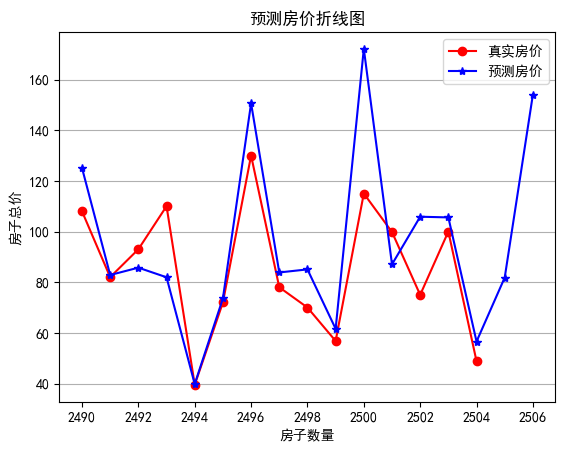

In [68]:
plt.figure()                                 
plt.plot(data1[['总价']][2490:], color='r', marker='o',label='真实房价')  
plt.plot(data1[['y_pred']][2490:], color='b', marker='*',label='预测房价')
plt.xlabel('房子数量')
plt.ylabel('房子总价')
plt.title("预测房价折线图")              
plt.legend()                  
plt.grid(axis='y')  
plt.show()